In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [23]:
# Step 1: Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 11s 0us/step


In [24]:
# Step 2: Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [25]:
# Step 3: Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [26]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/20
313/313 [==============================] - 65s 203ms/step - loss: 1.8791 - accuracy: 0.2960 - val_loss: 1.5391 - val_accuracy: 0.4330
Epoch 2/20
313/313 [==============================] - 57s 182ms/step - loss: 1.5277 - accuracy: 0.4426 - val_loss: 1.3575 - val_accuracy: 0.5048
Epoch 3/20
313/313 [==============================] - 57s 183ms/step - loss: 1.3820 - accuracy: 0.4997 - val_loss: 1.3067 - val_accuracy: 0.5246
Epoch 4/20
313/313 [==============================] - 58s 185ms/step - loss: 1.2786 - accuracy: 0.5445 - val_loss: 1.1716 - val_accuracy: 0.5825
Epoch 5/20
313/313 [==============================] - 59s 188ms/step - loss: 1.1937 - accuracy: 0.5779 - val_loss: 1.0833 - val_accuracy: 0.6115
Epoch 6/20
313/313 [==============================] - 58s 186ms/step - loss: 1.1225 - accuracy: 0.6054 - val_loss: 1.0300 - val_accuracy: 0.6284
Epoch 7/20
313/313 [==============================] - 60s 191ms/step - loss: 1.0723 - accuracy: 0.6211 - val_loss: 1.0303 - val_ac

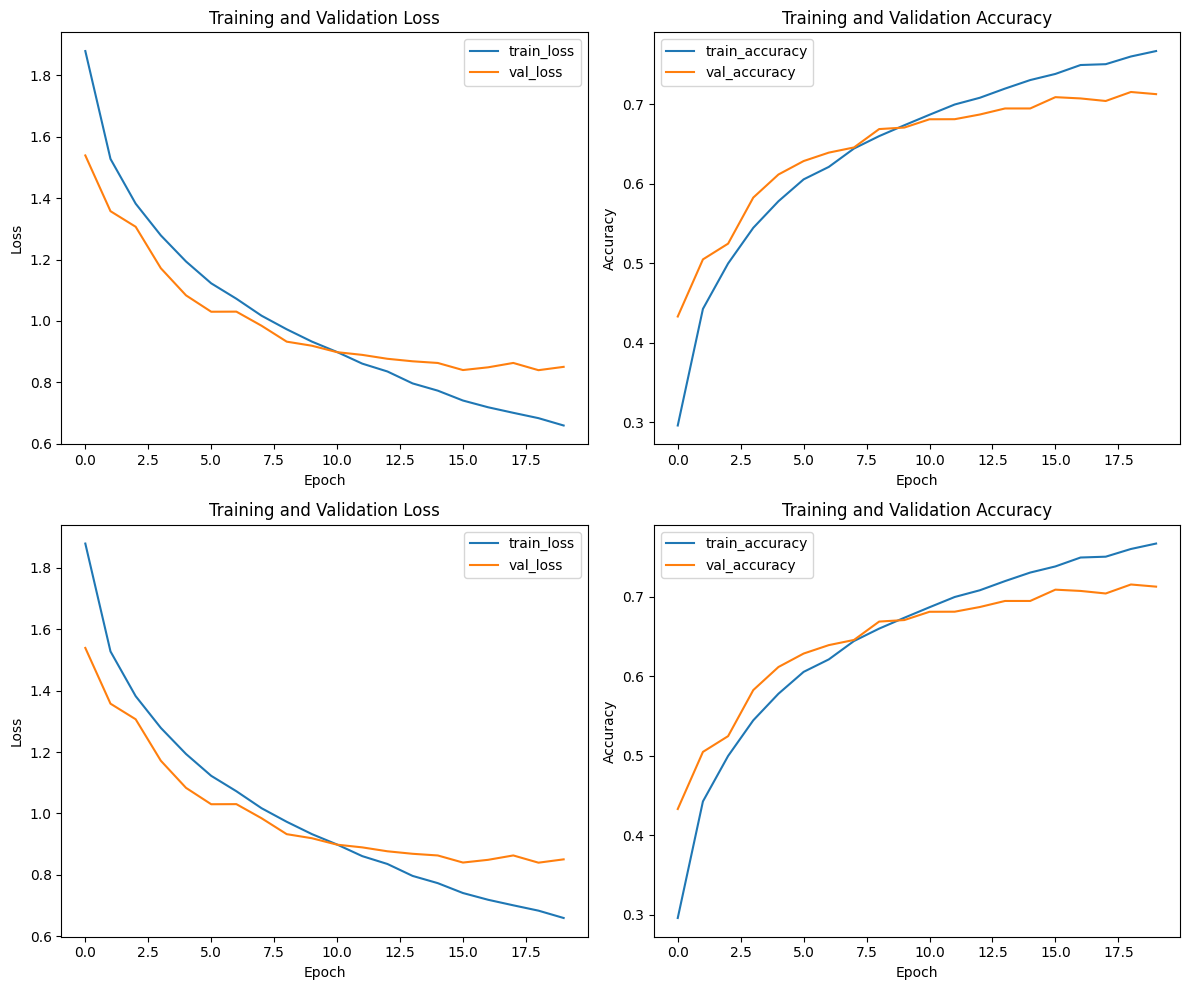

In [28]:
# Step 6: Plot training history
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Step 7: Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 6s 21ms/step - loss: 0.8622 - accuracy: 0.7113
Test Loss: 0.8622303009033203
Test Accuracy: 0.7113000154495239
